# OpenData Hackathon: Data Analysis and Visualisation using Python

## Short Bio:

I am *Dr. Sarvar Abdullaev*. I hold PhD in Computer Science from King's College London. I am currently working as an Assistant Professor at Inha University in Tashkent. Throughout my career in both industry and academy, I had chance to work with multiple projects which involved intensive data analysis and visualisation. For example, most of my PhD research was about processing and testing open data about financial markets in a simulated environment of trading agents that I designed. Also I used to be an eager participant and a humble winner of many hackathons held in the UK. For example, our team has won TechCrunch Disrupt Hackathon in 2014 for implementing an interactive map which showed the epidemiologic spread of contigious diseases like Ebola through the network of airports.

## What is this session about?

In this session, we will be working with different data sets to learn the basic data analysis and visualization skills in Python. We will also cover some topics in making predictions about the data. We will use popular Python packages NumPy, Pandas, SciPy and MatPlotLib in this lesson.

This notebook can be found from [this github repo](https://github.com/desmonduz/notebooks).

Now let's load some libraries that we will need to visualize our data nicely inside Notebook

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


First let's have basic knowledge about Pandas package in Python

In [2]:
import pandas as pd
import requests
from StringIO import StringIO #this library is needed to correctly read text files
import numpy as np

In [39]:
# let's load some data from data.gov.uz

# Samarkand region demographic details
url='https://data.gov.uz/ru/datasets/download/543/csv'

demog_str=requests.get(url).text

demog_df=pd.read_csv(StringIO(demog_str), 
                     sep=";",
                     header=None, 
                     usecols=range(0,25))

demog_df=demog_df.transpose()
demog_cols=demog_df.iloc[0]

demog_df=demog_df[1:]
demog_df.columns=pd.Index(demog_cols)
demog_df.index=range(1991,2015)

demog_df=demog_df.applymap(lambda x: float(x.replace(',', '.').replace('*','')))

demog_df[demog_cols[0]]=demog_df[demog_cols[0]]*1000
demog_df[demog_cols[5]]=demog_df[demog_cols[5]]*1000
demog_df[demog_cols[6]]=demog_df[demog_cols[6]]*1000
demog_df

,"﻿Доимий а?оли сони (йил охирига), минг киши","Ту?илганлар сони, (йилда), киши","Ўлганлар сони, (йилда), киши","Кўчиб келганлар сони, (йилда), киши","Кўчиб кетганлар сони, (йилда), киши","Тузилган нико?лар сони, (йилда), мингта","Ажралишлар сони, (йилда), мингта"
1991,2256100,84143,13428,27863,36547,28800,2600
1992,2313600,84553,14974,20601,32772,22700,2500
1993,2368900,80111,15568,18883,27913,25400,2200
1994,2423000,79778,15955,12423,21724,19200,2000
1995,2479900,82287,15301,9805,19644,17000,1700
1996,2534900,76726,15576,7825,14353,17300,1500
1997,2586700,72526,15019,8232,15205,18900,1800
1998,2627300,62199,14972,7472,14170,18300,1800
1999,2670300,64840,13533,9946,18222,19900,2000
2000,2710000,61266,14223,9891,17219,19200,1800


In [5]:
demog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1991 to 2014
Data columns (total 7 columns):
﻿Доимий а?оли сони (йил охирига), минг киши     24 non-null float64
Ту?илганлар сони, (йилда), киши                 24 non-null float64
Ўлганлар сони, (йилда), киши                    24 non-null float64
Кўчиб келганлар сони, (йилда), киши             24 non-null float64
Кўчиб кетганлар сони, (йилда), киши             24 non-null float64
Тузилган нико?лар сони, (йилда), мингта         24 non-null float64
Ажралишлар сони, (йилда), мингта                24 non-null float64
dtypes: float64(7)
memory usage: 1.5 KB


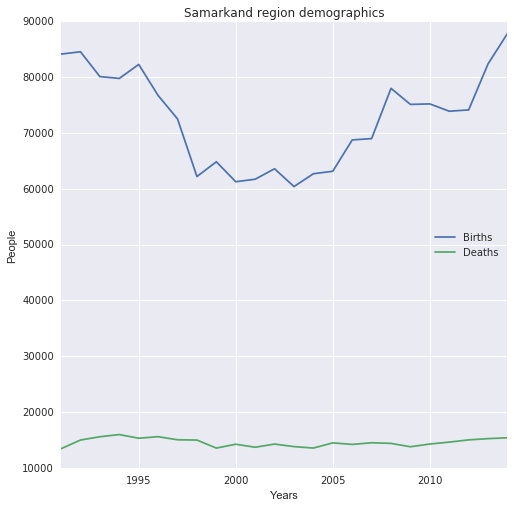

In [61]:
# p1=plt.plot(demog_df.iloc[:,0], label="Perm. Residents")
plt.figure(1, figsize=(8,8))

p2=plt.plot(demog_df.iloc[:,1], label="Births")
p3=plt.plot(demog_df.iloc[:,2], label="Deaths")

plt.legend(loc='center right')
plt.title('Samarkand region demographics')
plt.xlabel('Years')
plt.ylabel('People')
plt.xlim(1991,2014)
plt

plt.show()

In [46]:
#let's see the sum of all deaths for the last year

print demog_df.iloc[:,2].sum()

#now let's find the year when minimum births happened

print demog_df.iloc[:,1].idxmin()

349597.0
2003


In [48]:
#let's check the overall description
demog_df.describe()

,"﻿Доимий а?оли сони (йил охирига), минг киши","Ту?илганлар сони, (йилда), киши","Ўлганлар сони, (йилда), киши","Кўчиб келганлар сони, (йилда), киши","Кўчиб кетганлар сони, (йилда), киши","Тузилган нико?лар сони, (йилда), мингта","Ажралишлар сони, (йилда), мингта"
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2841166.666667,72680.666667,14566.541667,12016.750000,19050.791667,24662.500000,1816.666667
std,367802.370925,8671.663146,729.363807,4548.461472,5682.103675,7228.134193,465.941466
min,2256100.000000,60402.000000,13428.000000,7472.000000,13741.000000,16400.000000,800.000000
25%,2573750.000000,63480.750000,14094.250000,9657.750000,15329.500000,18300.000000,1575.000000
50%,2807600.000000,74020.000000,14477.500000,11052.500000,17860.000000,21350.000000,1800.000000
75%,3075950.000000,79861.250000,15071.000000,12354.750000,19214.500000,31175.000000,2000.000000
max,3514700.000000,87833.000000,15955.000000,27863.000000,36547.000000,36300.000000,2800.000000


In [75]:

demog_df.columns=[unicode(x) for x in demog_df.columns]
#let's find correlation between marriages and births
corr=demog_df.corr()
corr

,"﻿Доимий а?оли сони (йил охирига), минг киши","Ту?илганлар сони, (йилда), киши","Ўлганлар сони, (йилда), киши","Кўчиб келганлар сони, (йилда), киши","Кўчиб кетганлар сони, (йилда), киши","Тузилган нико?лар сони, (йилда), мингта","Ажралишлар сони, (йилда), мингта"
"﻿Доимий а?оли сони (йил охирига), минг киши",1.000000,0.014680,-0.053447,-0.347086,-0.652764,0.713508,0.017646
"Ту?илганлар сони, (йилда), киши",0.014680,1.000000,0.539917,0.552140,0.353827,0.514084,0.732990
"Ўлганлар сони, (йилда), киши",-0.053447,0.539917,1.000000,-0.098626,-0.109841,0.050205,0.382236
"Кўчиб келганлар сони, (йилда), киши",-0.347086,0.552140,-0.098626,1.000000,0.900503,0.308013,0.585935
"Кўчиб кетганлар сони, (йилда), киши",-0.652764,0.353827,-0.109841,0.900503,1.000000,-0.100459,0.394548
"Тузилган нико?лар сони, (йилда), мингта",0.713508,0.514084,0.050205,0.308013,-0.100459,1.000000,0.475398
"Ажралишлар сони, (йилда), мингта",0.017646,0.732990,0.382236,0.585935,0.394548,0.475398,1.000000


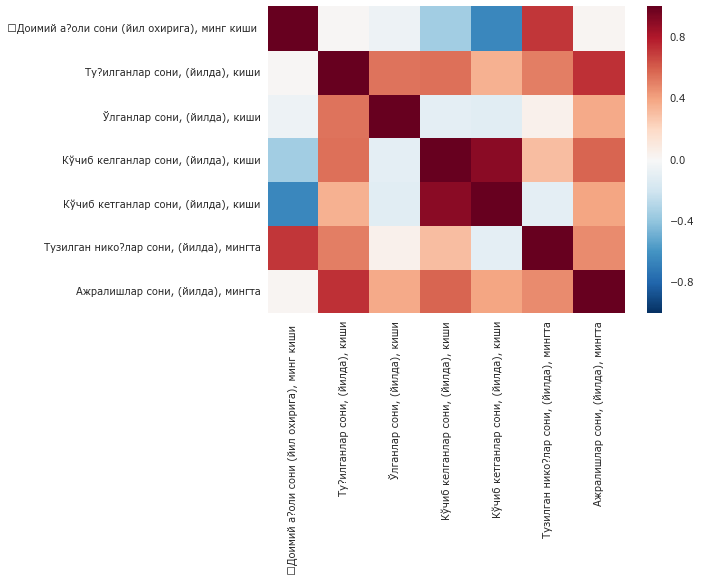

In [81]:
import seaborn as sns
sns.set_style("darkgrid",{"font.family":['verdana']})

sns.heatmap(corr)

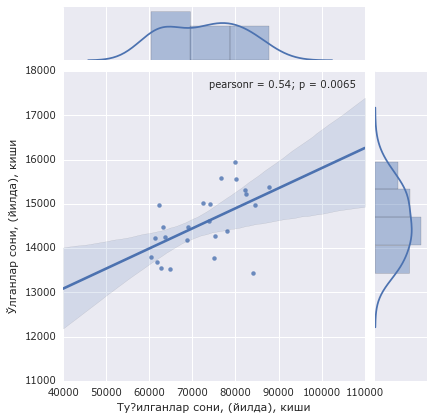

In [96]:
#distribution of births-deaths throughout years

sns.jointplot(demog_df.iloc[:,1],demog_df.iloc[:,2], kind='reg')

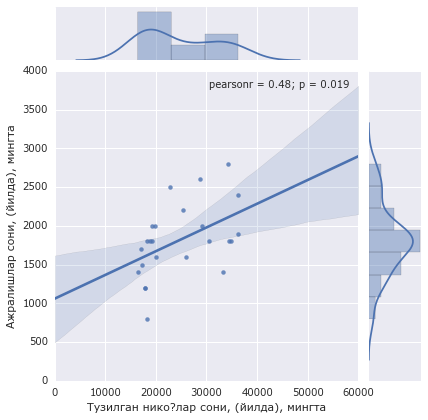

In [97]:
sns.jointplot(demog_df.iloc[:,5],demog_df.iloc[:,6], kind='reg')

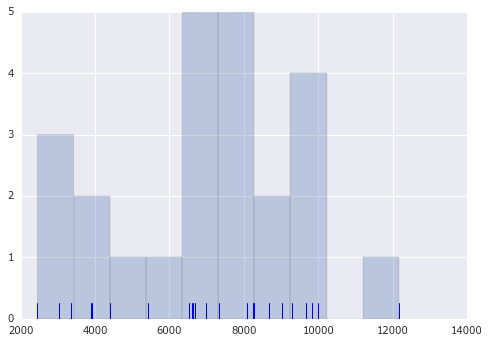

In [94]:
#moved in, moved out
demog_df['Net Moved Out']=demog_df.iloc[:,4]-demog_df.iloc[:,3]
plt.hist(demog_df['Net Moved Out'], alpha=0.3)
sns.rugplot(demog_df['Net Moved Out'])

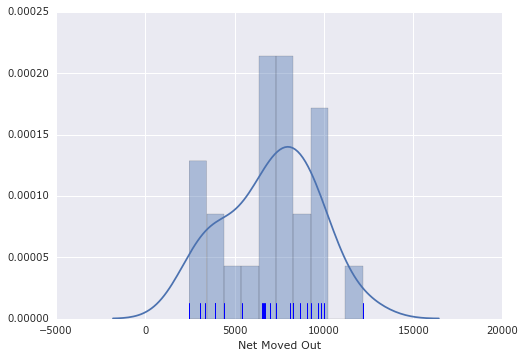

In [100]:
#the estimated probability distribution of yearly move-out
sns.distplot(demog_df['Net Moved Out'], bins=10)
sns.rugplot(demog_df['Net Moved Out'])

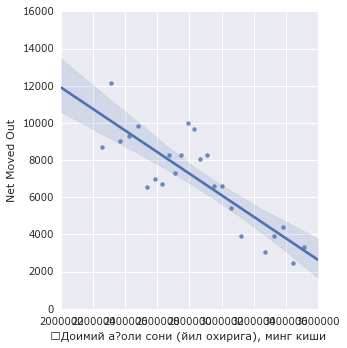

In [116]:
demog_df['Net Newborn']=demog_df.iloc[:,1]-demog_df.iloc[:,2]
demog_df.ix[:,['Net Newborn','Net Moved Out']]

,Net Newborn,Net Moved Out
1991,70715,8684
1992,69579,12171
1993,64543,9030
1994,63823,9301
1995,66986,9839
1996,61150,6528
1997,57507,6973
1998,47227,6698
1999,51307,8276
2000,47043,7328


In [130]:
import sklearn
from sklearn.linear_model import LinearRegression

X=demog_df.ix[:,['Net Newborn','Net Moved Out']]
Y=demog_df.ix[:,0]
lreg=LinearRegression()
lreg.fit(X, Y)

print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

      Net Newborn  Net Moved Out
1991        70715           8684
1992        69579          12171
1993        64543           9030
1994        63823           9301
1995        66986           9839
1996        61150           6528
1997        57507           6973
1998        47227           6698
1999        51307           8276
2000        47043           7328
2001        48031           8253
2002        49340           9994
2003        46604           9662
2004        49156           8086
2005        48678           8276
2006        54562           6627
2007        54512           6608
2008        63625           5420
2009        61352           3892
2010        60951           3039
2011        59298           3917
2012        59135           4415
2013        67163           2453
2014        72452           3347
 The estimated intercept coefficient is 4127962.80 
 The number of coefficients used was 2 


In [132]:
#cross validation
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((18, 2), (6, 2), (18,), (6,))


In [139]:
X_train

,Net Newborn,Net Moved Out
1995,66986,9839
2007,54512,6608
1999,51307,8276
2013,67163,2453
2014,72452,3347
1993,64543,9030
2010,60951,3039
2011,59298,3917
2003,46604,9662
1994,63823,9301


In [140]:
Y_train

1995    2479900
2007    3003400
1999    2670300
2013    3445600
2014    3514700
1993    2368900
2010    3270800
2011    3326200
2003    2826100
1994    2423000
1997    2586700
2002    2789100
2001    2749800
2009    3119000
2006    2955500
1998    2627300
2000    2710000
1992    2313600
Name: ﻿Доимий а?оли сони (йил охирига), минг киши , dtype: float64

In [142]:
X_test

,Net Newborn,Net Moved Out
2004,49156,8086
2012,59135,4415
2005,48678,8276
1996,61150,6528
1991,70715,8684
2008,63625,5420


In [144]:
Y_test

2004    2867100
2012    3380900
2005    2907500
1996    2534900
1991    2256100
2008    3061600
Name: ﻿Доимий а?оли сони (йил охирига), минг киши , dtype: float64

In [145]:
#train the model
lreg.fit(X_train,Y_train)

# #prediction test
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 28153247659.81
Fit a model X_train, and calculate MSE with X_test and Y_test: 66055762716.08


(array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  7.72580728e+08,   1.57245605e+10,   3.06765404e+10,
          4.56285202e+10,   6.05805000e+10,   7.55324798e+10,
          9.04844596e+10,   1.05436439e+11,   1.20388419e+11,
          1.35340399e+11,   1.50292379e+11]),
 <a list of 10 Patch objects>)

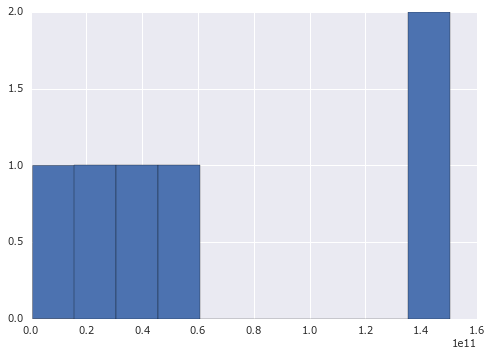

In [152]:
#errors distribution
plt.hist((Y_test - pred_test) ** 2)

## Tonnes of Data Science resources online:

### Start
* [Data Science Pipeline](http://machinelearningmastery.com/wp-content/uploads/2014/05/Overview-of-the-Applied-Machine-Learning-Process.png) - Detailed overview of data pipeline from MachineLearningMastery.com
* [Intro to ipython](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks/_edit#entire-books-or-other-large-collections-of-notebooks-on-a-topic) - A curation of Ipython Notebooks great for introductory level to python, programming, comp sci, data science and other topics.
* [How do I Become a Data Scientist?](http://www.quora.com/How-do-I-become-a-data-scientist) - Some more great starting points from William Chen.

### Data Science Courses:
* [Coursera](https://www.coursera.org/specialization/jhudatascience/1) - Data Science Specialization at Coursera - many other courses available as well.
* [Udacity](https://www.udacity.com/courses#!/data-science) - Online MOOCs that are the Data Science related courses. by I
* [Data Science Bootcamps](http://yet-another-data-blog.blogspot.com/2014/04/data-science-bootcamp-landscape-full.html) - A collection of all bootcamps currently on the market as of April 5, 2014 by Ikechukwu Okonkwo.
* [Coursera Machine Learning Course](https://www.coursera.org/course/ml) - Andrew Ng's pinnacle Machine Learning course.
* [Edx](https://www.edx.org/course/mitx/mitx-6-00-2x-introduction-computational-2836#.VEANx9TF-tw) - EDX courses related to data science.

###  Data Structures & CS Topics
* [Algorithms & Data Structures](http://www.bogotobogo.com/Algorithms/algorithms.php) - Binary trees, hash tables, linked lists, big(O) notation and more.
* [Algorithm & Data Structures](http://interactivepython.org/courselib/static/pythonds/index.html) - Well organized detailed and digestible site full of content covering data structures, algorithms, recursion and assignments!
* [Big O Notation](http://interactivepython.org/courselib/static/pythonds/AlgorithmAnalysis/BigONotation.html) - Great details and visual of big-O notation.
* [Visualizations of Data Structures](http://www.cs.usfca.edu/~galles/visualization/Algorithms.html) - Collection of different algorithms (graph problems) and data structures (queues, heaps, hashes) that walks through the visualization to get a better intuitive understanding. 
* [Data Structures CheatSheet & Big Oh Notation](http://bigocheatsheet.com/)
* [Data Structures CheatSheet -smaller more readable](https://www.clear.rice.edu/comp160/data_cheat.html)
* [Coursera: Stanford Algorithms Design & Analysis ](https://class.coursera.org/algo-006) - Course on algorithm design & analysis

### Statistics
Some primers on understanding statistics and other resources to get a deeper understanding.
* [Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o) - John Rauser's really great video on statistics - funny and engaging with a good message.
* [Probability Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb) - full book all online through ipython notebooks.
* [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) - Github Repo for the book above.
* [Statistics Cheat Sheet in Ipython Notebook](http://nbviewer.ipython.org/url/trust.sce.ntu.edu.sg/~gguo1/blogs/Statistics/Statistics.ipynb)
* [The only probability Cheatsheet you'll ever need](https://bayesrule.files.wordpress.com/2014/07/probability_cheatsheet_140718.pdf) - Self explanatory - (thanks William Chen @ http://datastories.quora.com/) for pointing me this great cheat sheet out - wish I had that back at college.
* [Khan Academy: Statistics](https://www.khanacademy.org/#statistics) - Tons of videos to help learn statistics concepts.
* [Statistical Distributions in iPython Notebook](http://nbviewer.ipython.org/urls/gist.github.com/mattions/6113437/raw/c5468ea930d6960225d83e112d7f3d00d9c13398/Exploring+different+distribution.ipynb) - Discrete, Bernoulli, Poisson, Binomial, Alpha, Beta etc.  The descriptions are mathematical - will find another resource to explain.

### Stats/Engineering Libraries
A collection of workhorse libraries that are elemental for any python data scientist.
* [Pandas](http://pandas.pydata.org/) Wes McKinney's pandas library for EDA on small to medium sized data sets when you don't want to put the infrastructure for SQL or when it isn't necessary.  It has many other great applications other than just better than SQL on small to medium data sets.
  * [Numpy/Pandas/Scipy Cheatsheet](https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf) - self explanatory
* [SciPy](http://www.scipy.org/) - Open-source software for mathematics, science and engineering.
* [NumPy](http://www.numpy.org/) - Fundamental package for scientific computing with Python.
* [StatsModels](http://statsmodels.sourceforge.net/) - Module that allows users to explore data, estimate statistical models and perform statistical tests.
* [PyMC](https://pypi.python.org/pypi/pymc) - Bayesian estimation useful for Markov chain Monte Carlo analysis (among other things).


### Data Acquisition
Libraries that are very helpful for abstracting away some of the complications of scraping or working with HTTP.
* [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/) - A python library to make web-scraping HTML easier.
  * [Beautiful Soup Cheat Sheet](http://youkilljohnny.blogspot.com/2014/03/beautifulsoup-cheat-sheet-parse-html-by.html)
* [Requests](http://docs.python-requests.org/en/latest/) - HTTP for Humans - python library that makes working with http and api's more effortless

### Processing & Exploratory Data Analysis
A collection of documents explaining some of the ways to do processing & EDA.
* [Unix for Processing](http://www.theunixschool.com/p/awk-sed.html) - sed & awk for data processing.
* [Pandas](http://pandas.pydata.org/) - Already mentioned is great for data processing - cleaning, filtering and getting rid of nan's, normalizing, scaling, replacing values, etc.
* [SciKit Learn for Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) - Doc on sklearn's preprocessing methods.
* [Regular Expressions](http://www.zytrax.com/tech/web/regex.htm) - Regex explained.

### Data Visualization
Collection of the best libraries that I know for easy and powerful data visualizations.
* [ggplot](http://ggplot.yhathq.com/) - ggplot for python ported by the team at yhat.
* [matplotlib](http://matplotlib.org/) - Awesome plotting library for python.
* [d3](http://d3js.org/) - Mike Bostock's viz library - the de facto gold standard for polished visualization - in js, steep learning curve but beautiful outcomes.
* [bokeh](http://bokeh.pydata.org/) - Interactive visualization library.
* [d3py](https://github.com/mikedewar/d3py) - Another library for data viz.
* [vincent](http://vincent.readthedocs.org/en/latest/)  - Help with python for d3.
* [seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/) - Clean statistical data visualization library.


### Machine Learning
There is a lot of information available online about the theory, mathematical intuition, tuning for this discipline.  Here are some tools that are currently available.
* [A visual introduction to Machine Learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) - Awesome d3 visualization to help understand machine learning.
* [SciKit-Learn](http://scikit-learn.org/stable/) - Simple and efficient machine learning tools for data mining and data analysis
* [NLTK](http://www.nltk.org/) - Natural Language Toolkit to work with human languages data.
* [Tour of Machine Learning Algorithms](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/) - Blog post about some of the high level ML methods
* [VIDEO - How to get started w/mL](https://www.youtube.com/watch?v=uBorfxosVYs) - Melanie Warrick @ PyCon 2014.
* [Some ML methods classified](http://nyghtowlblog.files.wordpress.com/2014/04/ml_algorithms.png?w=535&h=311) - Classification for some sample ML algorithms by Melanie Warrick.
* [SciKit-image](http://scikit-image.org/) - Algorithms for image processing.
* [Machine Learning CheatSheet](https://github.com/soulmachine/machine-learning-cheat-sheet) - I would actually say this is more than just a cheat sheet given that there are > 100 pages of notes.
* [Awesome Machine Learning](https://github.com/josephmisiti/awesome-machine-learning) - List of machine learning libraries in all languages and also Kaggle competition source code by Joseph Misiti.
